# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

<AxesSubplot:xlabel='Year'>

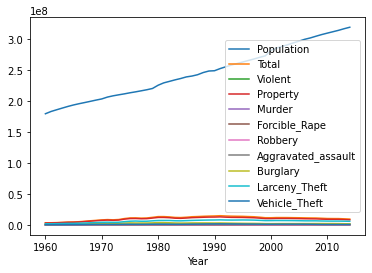

In [18]:

df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [19]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


# Para poner 2 ejes con sus leyendas
## https://www.kite.com/python/answers/how-to-add-secondary-axis-to-a-legend-in-python


In [20]:
df.iloc[:,1:].columns.tolist()

['Total',
 'Violent',
 'Property',
 'Murder',
 'Forcible_Rape',
 'Robbery',
 'Aggravated_assault',
 'Burglary',
 'Larceny_Theft',
 'Vehicle_Theft']

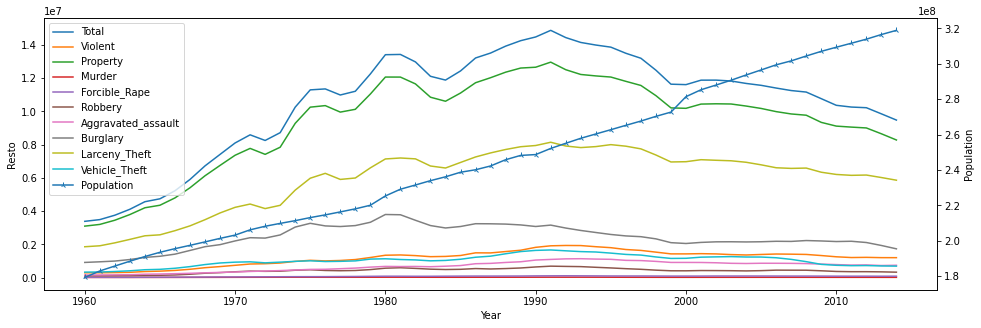

In [21]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df.index, df.iloc[:,1:], label = df.iloc[:,1:].columns.tolist())
ax.set_ylabel('Resto')
ax.set_xlabel('Year')
ax2 = ax.twinx()
ax2.plot(df.index, df.Population, label= 'Population', marker = '2')
ax2.set_ylabel('Population')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);

#ax.legend()
#ax2.legend(loc = 'left')
#plt.show()

In [22]:
df.drop(['Population', 'Total'], axis=1,inplace=True)
df.head()

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


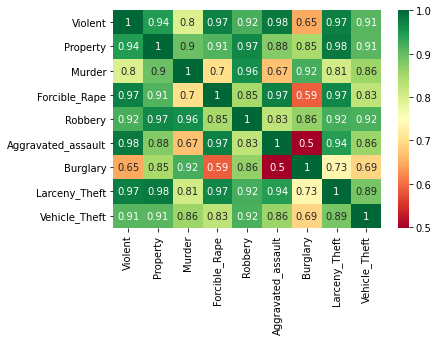

In [23]:
sns.heatmap(df.corr(), vmax=df.corr().max().max(), vmin=df.corr().min().min(), cmap="RdYlGn", annot= True);

## Columnas mejor correlacionadas

In [24]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False).iloc[8:19]

Vehicle_Theft       Vehicle_Theft         1.000000
Violent             Aggravated_assault    0.981071
Aggravated_assault  Violent               0.981071
Property            Larceny_Theft         0.980528
Larceny_Theft       Property              0.980528
Violent             Larceny_Theft         0.974791
Larceny_Theft       Violent               0.974791
Aggravated_assault  Forcible_Rape         0.974379
Forcible_Rape       Aggravated_assault    0.974379
                    Violent               0.973914
Violent             Forcible_Rape         0.973914
dtype: float64

## 5 columnas mejor correlacionadas con "Murder"

In [25]:
df.corr()['Murder'].sort_values(ascending = False).iloc[1:6].index.to_list()

['Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']

## Modelo de regresión no lineal --> Polinomio grado 6

In [48]:
x = np.array(df[['Robbery', 'Burglary', 'Property', 'Vehicle_Theft', 'Larceny_Theft']])
y = np.array(df['Murder'])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (44, 5)
x_test.shape: (11, 5)
y_train.shape: (44,)
y_test.shape: (11,)


In [50]:
model_pol = PolynomialFeatures(degree=6)

In [51]:
x_train_pol = model_pol.fit_transform(x_train, y_train)

In [52]:
x_train_pol.shape

(44, 462)

In [53]:
y.shape

(55,)

In [54]:
model_linreg = LinearRegression()

In [100]:
repkfold = RepeatedKFold(n_splits=23, n_repeats=7, random_state=42)

lista_RMSE_train = []
lista_RMSE_val = []
lista_MAE_train = []
lista_MAE_val = []
lista_score_train = []
lista_score_val = []

epoca = 1
for i, (train_index, val_index) in enumerate(repkfold.split(x_train_pol, y_train)):
    
    print('ITERACION', i+1)
    print('\ntrain:', train_index)
    print('val:', val_index)
    
    x_train_cv, x_val_cv = x_train_pol[train_index], x_train_pol[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]
    model_linreg.fit(x_train_cv, y_train_cv)
    score_train = model_linreg.score(x_train_cv, y_train_cv)
    lista_score_train.append(score_train)
    print('Score Train:', score_train)
    score_val = model_linreg.score(x_val_cv, y_val_cv)
    lista_score_val.append(score_val)
    print('Score Val:', score_val)
    prediccion_y_train = model_linreg.predict(x_train_cv)
    prediccion_y_val = model_linreg.predict(x_val_cv)
    rmse_error_train = np.sqrt(mean_squared_error(y_train_cv, prediccion_y_train))
    lista_RMSE_train .append(rmse_error_train)
    rmse_error_val = np.sqrt(mean_squared_error(y_val_cv, prediccion_y_val))
    lista_RMSE_val.append(rmse_error_val)
    mae_error_train = mean_absolute_error(y_train_cv, prediccion_y_train)
    lista_MAE_train.append(mae_error_train)
    mae_error_val = mean_absolute_error(y_val_cv, prediccion_y_val)
    lista_MAE_val.append(mae_error_val)
    print('RMSE error y_train:', rmse_error_train)
    print('RMSE error y_val:', rmse_error_val)
    print('MAE error y_train:', mae_error_train)
    print('MAE error y_val:', mae_error_val)
    #if epoca == 1:

    if (i+1) % 23 == 0:
        print('\n\n----------     F I N    E P O C A   ' + str(epoca) + '  ----------\n\n')
        epoca += 1 
    print('\n========\n')

ITERACION 1

train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43]
val: [24 37]
Score Train: 0.9999999999999875
Score Val: -5766.216581649988
RMSE error y_train: 0.0004713620248565494
RMSE error y_val: 283036.5509553316
MAE error y_train: 0.0003400152168718965
MAE error y_val: 267252.9556655884


ITERACION 2

train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43]
val: [25 36]
Score Train: 0.9999999999999949
Score Val: -1979.1540248485471
RMSE error y_train: 0.0002923451012415642
RMSE error y_val: 122572.27958698958
MAE error y_train: 0.00020849299281031736
MAE error y_val: 87160.6797982009


ITERACION 3

train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 41 42 43]
val: [34 40]
Score Train: 0.9999999999999898
Score Val: -76385236.51621693
RMSE error y_t

In [91]:
df_error = pd.DataFrame(list(zip(lista_RMSE_train, lista_RMSE_val, lista_MAE_train, lista_MAE_val, lista_score_train, lista_score_val)), columns=[['RMSE Train','RMSE Val', 'MAE Train', 'MAE Val', 'Score Train', 'Score Val']])
df_error

,RMSE Train,RMSE Val,MAE Train,MAE Val,Score Train,Score Val
0,0.000471,2.830366e+05,0.000340,2.672530e+05,1.0,-5.766217e+03
1,0.000292,1.225723e+05,0.000208,8.716068e+04,1.0,-1.979154e+03
2,0.000429,1.310980e+06,0.000340,1.028037e+06,1.0,-7.638524e+07
3,0.000537,9.499925e+05,0.000492,7.988541e+05,1.0,-1.868403e+06
4,0.000291,8.674224e+03,0.000215,8.518788e+03,1.0,-6.592623e+00
...,...,...,...,...,...,...
156,0.000689,1.837359e+05,0.000588,1.632366e+05,1.0,-5.270997e+03
157,0.000737,1.340178e+05,0.000575,1.209413e+05,1.0,-3.115890e+03
158,0.064255,4.727662e+05,0.050296,3.345889e+05,1.0,-3.539830e+03
159,0.000342,1.038949e+03,0.000235,1.038949e+03,1.0,NaN


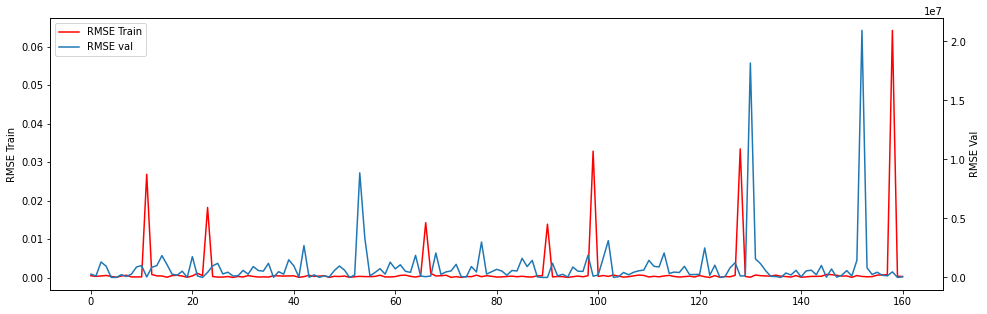

In [82]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df_error['RMSE Train'], label = 'RMSE Train', color = 'red')
ax.set_ylabel('RMSE Train')
ax2 = ax.twinx()
ax2.plot(df_error['RMSE Val'], label= 'RMSE val')
ax2.set_ylabel('RMSE Val')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);

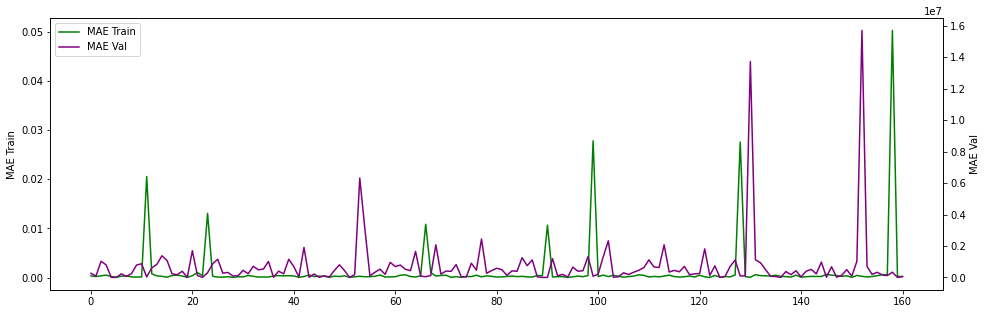

In [86]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df_error['MAE Train'], label = 'MAE Train', color = 'green')
ax.set_ylabel('MAE Train')
ax2 = ax.twinx()
ax2.plot(df_error['MAE Val'], label= 'MAE Val', color = 'purple')
ax2.set_ylabel('MAE Val')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);

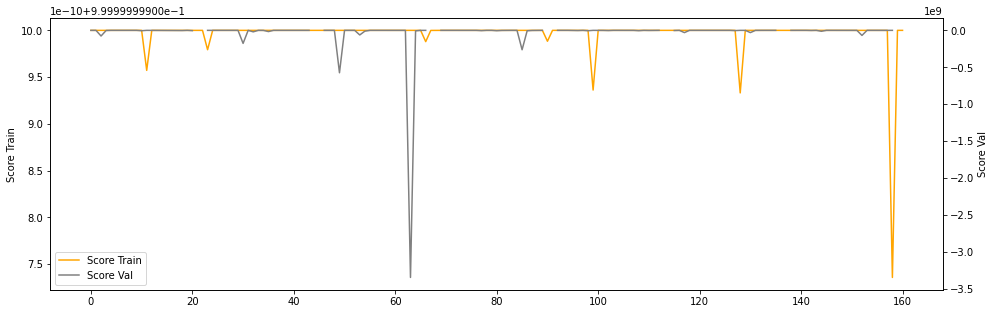

In [95]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df_error['Score Train'], label = 'Score Train', color = 'orange')
ax.set_ylabel('Score Train')
ax2 = ax.twinx()
ax2.plot(df_error['Score Val'], label= 'Score Val', color = 'grey')
ax2.set_ylabel('Score Val')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);